<a href="https://colab.research.google.com/github/carlosmirandadurand/Experiments/blob/feature%2Fprophet/Prophet_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facebook Prophet Forecasting Packege**
---
Source: https://facebook.github.io/prophet/docs/quick_start.html


In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
# Load time series data.  Wikipedia page for Peyton Manning scraped using the Wikipediatrend package in R
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [27]:
df.shape[0]/365

7.958904109589041

In [10]:
# Fit simple forecasting model to historical data. Simple = linear, additive model with yearly and weekly effects
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/cf0fipgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/195lc45h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12248', 'data', 'file=/tmp/tmp1njg5ry4/cf0fipgv.json', 'init=/tmp/tmp1njg5ry4/195lc45h.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelj5w3glqj/prophet_model-20221217062723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:27:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Make dataframe that extends into the future a specified number of days
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [18]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3270 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.7 KB


In [24]:
future.shape[0] - df.shape[0]

365

In [16]:
# Predict time series values for future dataframe
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.483621,8.923281
3266,2017-01-16,8.533442,7.803411,9.247994
3267,2017-01-17,8.320853,7.594546,9.075932
3268,2017-01-18,8.153517,7.423689,8.887577
3269,2017-01-19,8.165423,7.385020,8.909000


In [25]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          3270 non-null   datetime64[ns]
 1   trend                       3270 non-null   float64       
 2   yhat_lower                  3270 non-null   float64       
 3   yhat_upper                  3270 non-null   float64       
 4   trend_lower                 3270 non-null   float64       
 5   trend_upper                 3270 non-null   float64       
 6   additive_terms              3270 non-null   float64       
 7   additive_terms_lower        3270 non-null   float64       
 8   additive_terms_upper        3270 non-null   float64       
 9   weekly                      3270 non-null   float64       
 10  weekly_lower                3270 non-null   float64       
 11  weekly_upper                3270 non-null   float64     

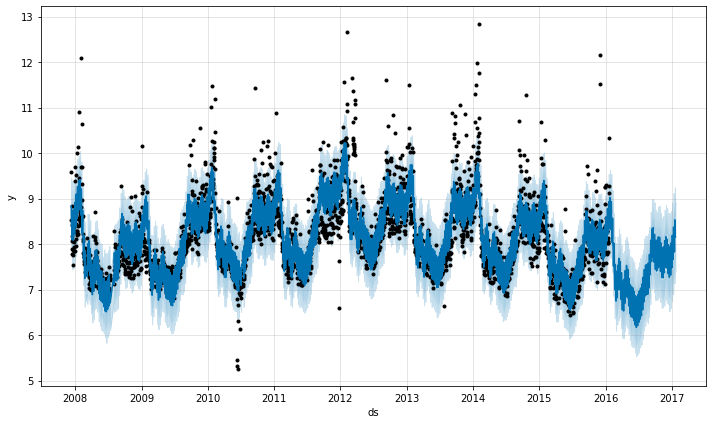

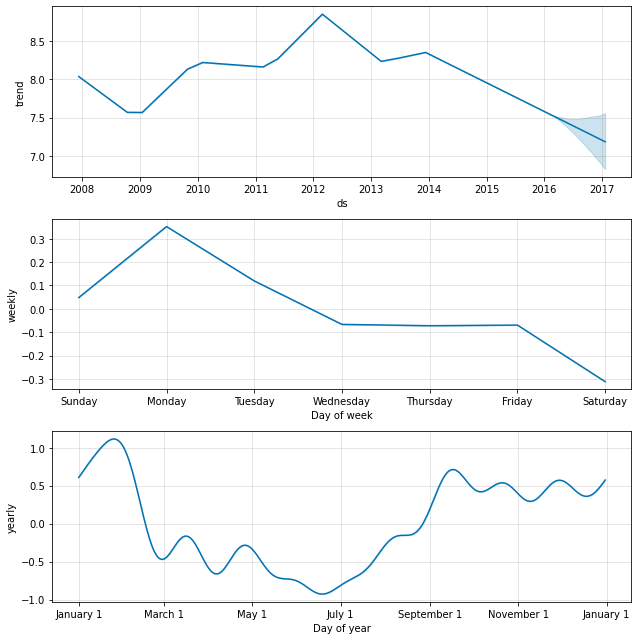

In [28]:
# Python
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [31]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [32]:
plot_components_plotly(m, forecast)

**Forecasting Growth with Saturating Model**

In [39]:
# Load different dataset: page visits to the R (programming language) page on Wikipedia
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2863 non-null   object 
 1   y       2863 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.9+ KB


In [40]:
# Set a cap (maximum achievable point, total market size, "carrying capacity")
df['cap'] = 8.5  # Constant in this case, but it doesn't have to be

In [41]:
# Fit historical data to a logistic growth trend model, with a specified carrying capacity
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/_adzg2md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/0u4esrt2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36698', 'data', 'file=/tmp/tmp1njg5ry4/_adzg2md.json', 'init=/tmp/tmp1njg5ry4/0u4esrt2.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelhlu_8bad/prophet_model-20221217065225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:52:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:52:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


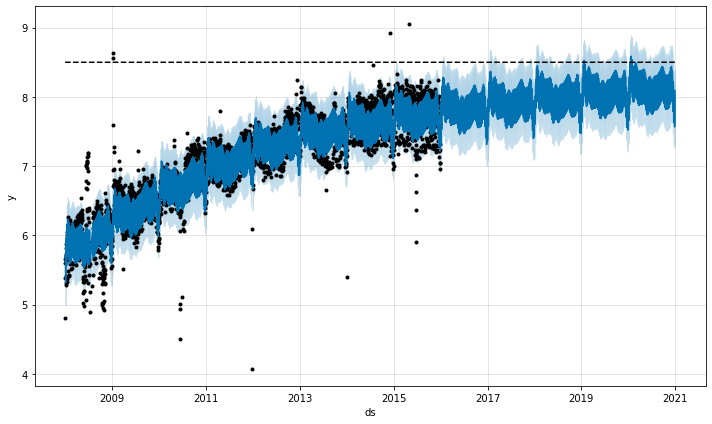

In [47]:
# Predict 5 years into the future, assuming constant capacity
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/w7rpqlw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/gtbqhu9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71426', 'data', 'file=/tmp/tmp1njg5ry4/w7rpqlw3.json', 'init=/tmp/tmp1njg5ry4/gtbqhu9n.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelfw5ntc1w/prophet_model-20221217065711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


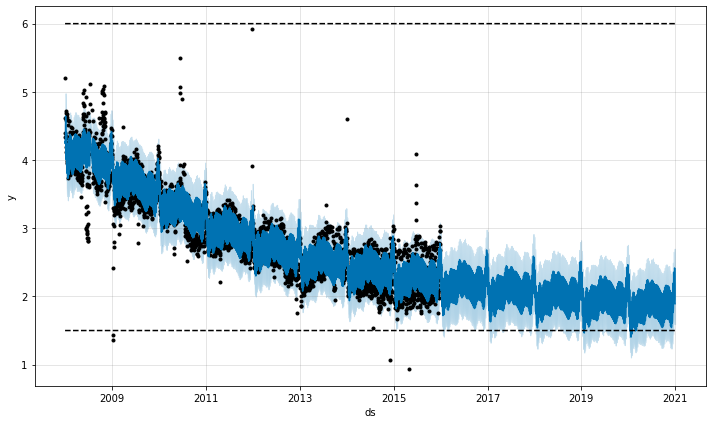

In [48]:
# Saturating Minimum:  Demonstrate how to use a floor
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

In [65]:
# Cleanup memory 
del df, forecast, future
del m, fig1, fig2
del fcst

**Trend Changepoints**

In [68]:
# Load again the Wikipedia page for Peyton Manning and fit the basic model
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/77_nl_zg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/pb8tcyl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12222', 'data', 'file=/tmp/tmp1njg5ry4/77_nl_zg.json', 'init=/tmp/tmp1njg5ry4/pb8tcyl0.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model77gd79yy/prophet_model-20221217071327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


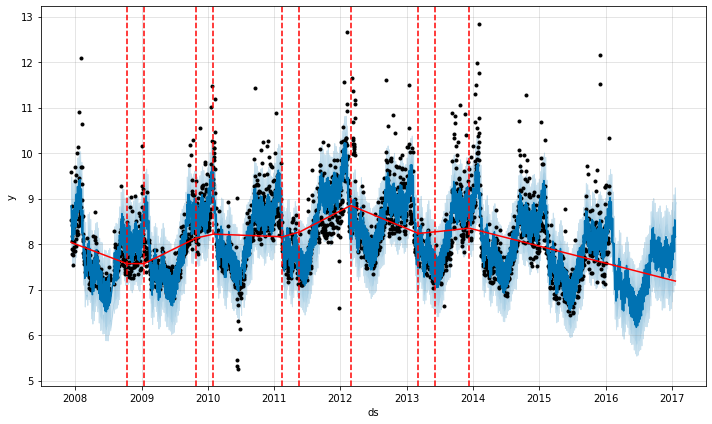

In [69]:
# Show default changepoints 
# By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series.
# Then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization). 
# To extend changeoints to the first 90% of the timeseries: m = Prophet(changepoint_range=0.9) 
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/8zsxrjqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/eehcu_31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70632', 'data', 'file=/tmp/tmp1njg5ry4/8zsxrjqg.json', 'init=/tmp/tmp1njg5ry4/eehcu_31.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelmujgulqn/prophet_model-20221217072036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


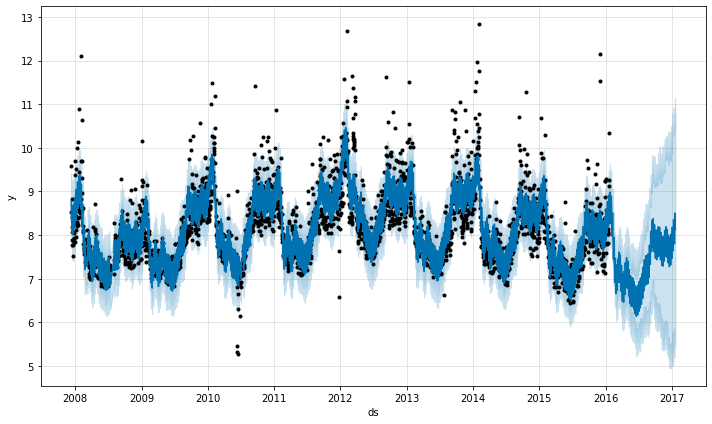

In [70]:
# Adjusting trend flexibility
#  - Situation: When trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), 
#  - Solution:  Adjust the strength of the sparse prior using the input argument changepoint_prior_scale. 
#               By default, this parameter is set to 0.05. Increasing it will make the trend more flexible.
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/fi40hv8_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/6hn5vlhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70041', 'data', 'file=/tmp/tmp1njg5ry4/fi40hv8_.json', 'init=/tmp/tmp1njg5ry4/6hn5vlhd.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelwhdpa2ys/prophet_model-20221217072049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


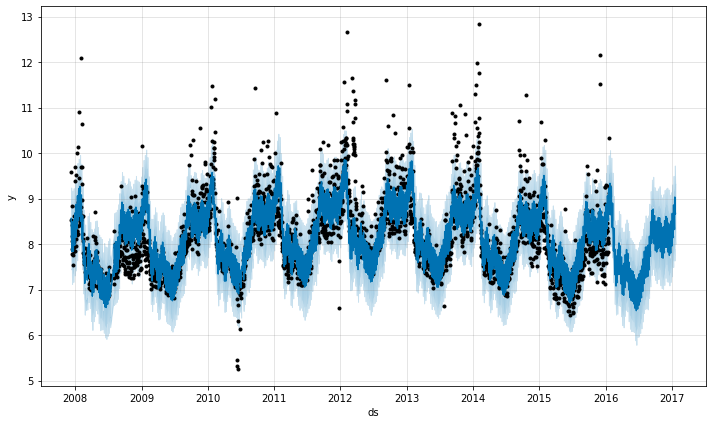

In [71]:
# Decreasing it will make the trend less flexible
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/1hj3867z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/acuhv2k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20440', 'data', 'file=/tmp/tmp1njg5ry4/1hj3867z.json', 'init=/tmp/tmp1njg5ry4/acuhv2k8.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelvbjaqtdh/prophet_model-20221217072334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


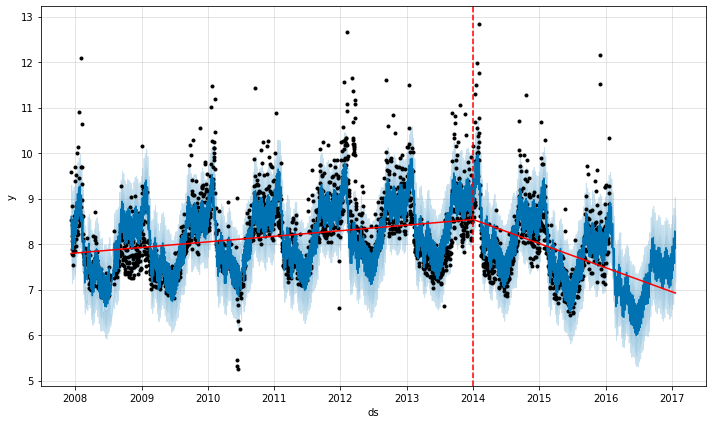

In [73]:
# Manually specifying the locations of the changepoints
# - Slope changes will then be allowed only at these points, with the same sparse regularization as before.
# - Alternative option: keep the automatic detection and just add manual additional changepoints if Prophet missed any
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [74]:
# Cleanup 
del df, future, forecast
del m, fig, a 

**Seasonality, Holiday Effects, And Regressors**

---

Source: https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [77]:
# Load again the Wikipedia page for Peyton Manning and fit the basic model
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/43b8i4tt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/jbrz8an9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14620', 'data', 'file=/tmp/tmp1njg5ry4/43b8i4tt.json', 'init=/tmp/tmp1njg5ry4/jbrz8an9.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelrybrgebx/prophet_model-20221217073626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
# Modeling Holidays and Special Events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

holidays = pd.concat((playoffs, superbowls))
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [79]:
# Fit model including holiday effects
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/i6tlyfr_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/th6psf41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62582', 'data', 'file=/tmp/tmp1njg5ry4/i6tlyfr_.json', 'init=/tmp/tmp1njg5ry4/th6psf41.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modeljes6pg7k/prophet_model-20221217073640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
# See the holiday effect in the forecast dataframe
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.22176,1.208297
2191,2014-02-03,1.90146,1.459763
2532,2015-01-11,1.22176,0.000000
2533,2015-01-12,1.90146,0.000000
2901,2016-01-17,1.22176,0.000000
2902,2016-01-18,1.90146,0.000000
2908,2016-01-24,1.22176,0.000000
2909,2016-01-25,1.90146,0.000000
2922,2016-02-07,1.22176,1.208297
2923,2016-02-08,1.90146,1.459763


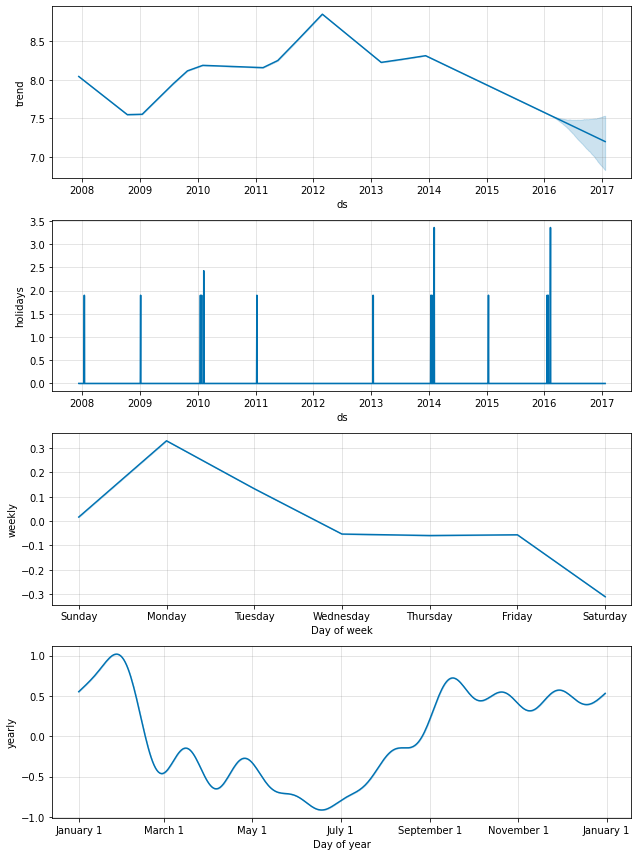

In [81]:
# Component plots will include holiday effects
fig = m.plot_components(forecast)

In [82]:
# Built-in Country Holidays
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/jk446r75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/h35ddbmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95023', 'data', 'file=/tmp/tmp1njg5ry4/jk446r75.json', 'init=/tmp/tmp1njg5ry4/h35ddbmi.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model9klfi1kz/prophet_model-20221217074028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
# US holidays that are included
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

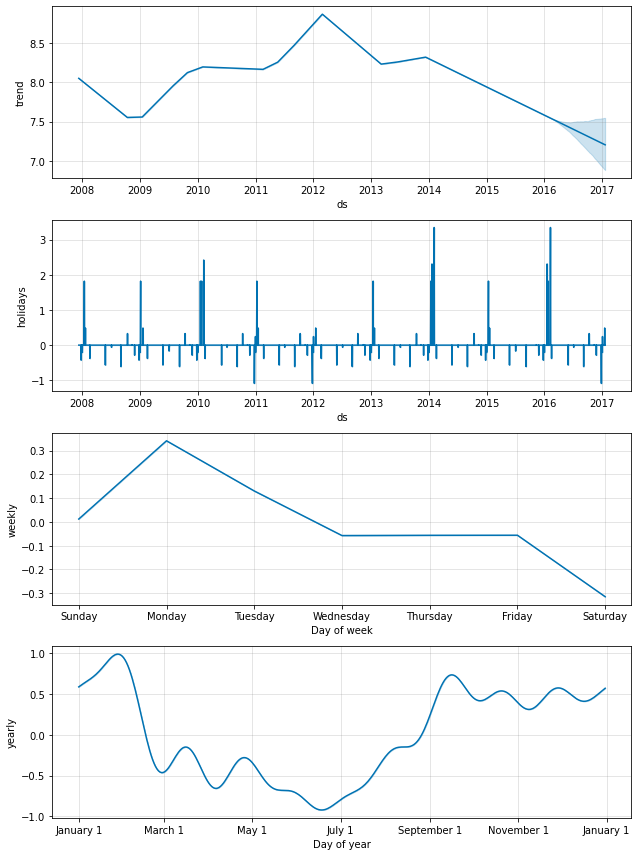

In [84]:
# Python
forecast = m.predict(future)
fig = m.plot_components(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/vp1r42g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/s3xdj7yo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8435', 'data', 'file=/tmp/tmp1njg5ry4/vp1r42g9.json', 'init=/tmp/tmp1njg5ry4/s3xdj7yo.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model7f934ja5/prophet_model-20221217074514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


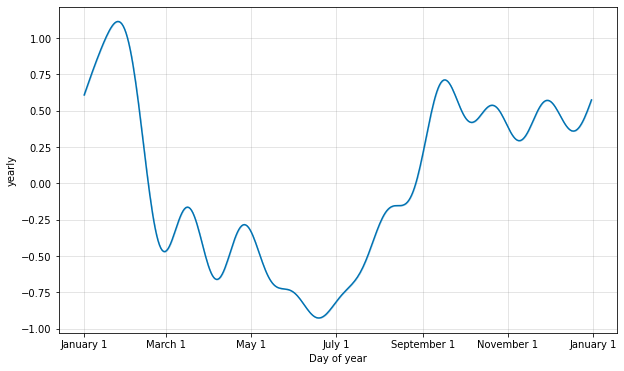

In [85]:
# Fourier Order for Seasonalities
# By default:
# - Yearly seasonality with Fourier order of 10 
# - Weekly seasonality with Fourier order of 3
# - Daily seasonality for a sub-daily time series, if the time series is more than two cycles long
# - No other seasonalitys included by default (monthly, quarterly, hourly) but can be added manually 
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/_9jbzj3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/q62cwtb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95079', 'data', 'file=/tmp/tmp1njg5ry4/_9jbzj3y.json', 'init=/tmp/tmp1njg5ry4/q62cwtb0.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelebf6l4_p/prophet_model-20221217074559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


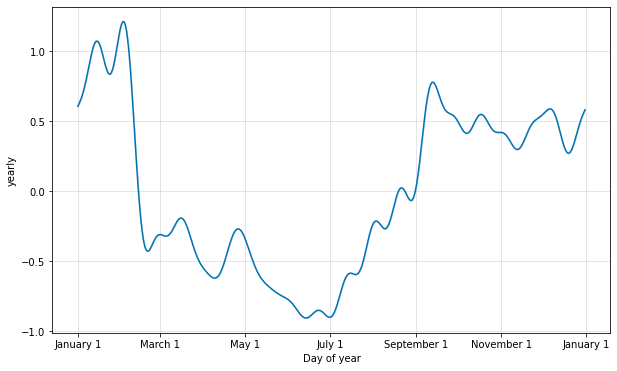

In [86]:
# Increase order when the seasonality needs to fit higher-frequency changes (but can also lead to overfitting)
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/cl94_tk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/l07m92zq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93605', 'data', 'file=/tmp/tmp1njg5ry4/cl94_tk8.json', 'init=/tmp/tmp1njg5ry4/l07m92zq.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelphttq6k3/prophet_model-20221217074947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


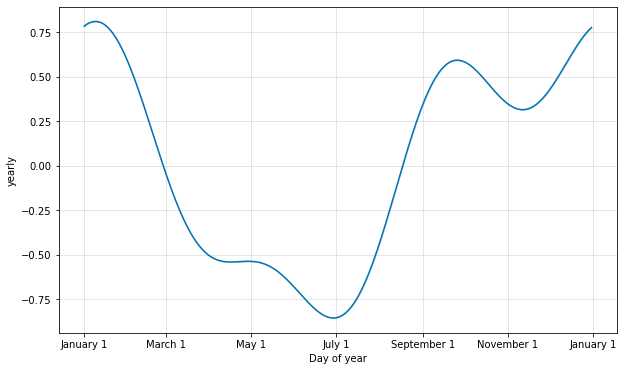

In [88]:
# Decrease order when the seasonality needs to fit lower-frequency changes (but can also lead to underfitting)
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=3).fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/fjoqdzoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/0yuffcpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90634', 'data', 'file=/tmp/tmp1njg5ry4/fjoqdzoj.json', 'init=/tmp/tmp1njg5ry4/0yuffcpk.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model1r82npbc/prophet_model-20221217075345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


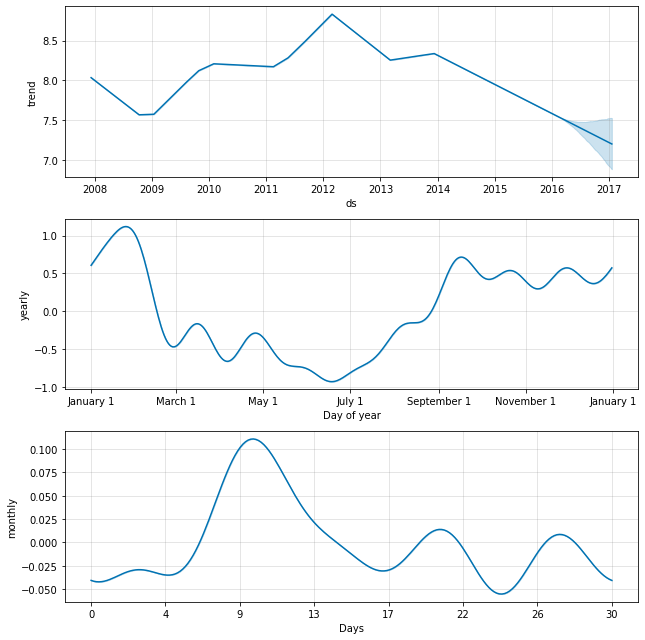

In [89]:
# Specifying Custom Seasonalities
# - Example: Replace the weekly seasonality with monthly seasonality:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [91]:
# Conditional seasonalities (seasonalities that depend on other factors)
# - Example: weekly seasonal pattern that is different during football season than it is during the rest of the year
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ds          2905 non-null   object 
 1   y           2905 non-null   float64
 2   on_season   2905 non-null   bool   
 3   off_season  2905 non-null   bool   
dtypes: bool(2), float64(1), object(1)
memory usage: 51.2+ KB


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/zfil65ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/w9p_42r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76281', 'data', 'file=/tmp/tmp1njg5ry4/zfil65ct.json', 'init=/tmp/tmp1njg5ry4/w9p_42r6.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelmha6mgz2/prophet_model-20221217075909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


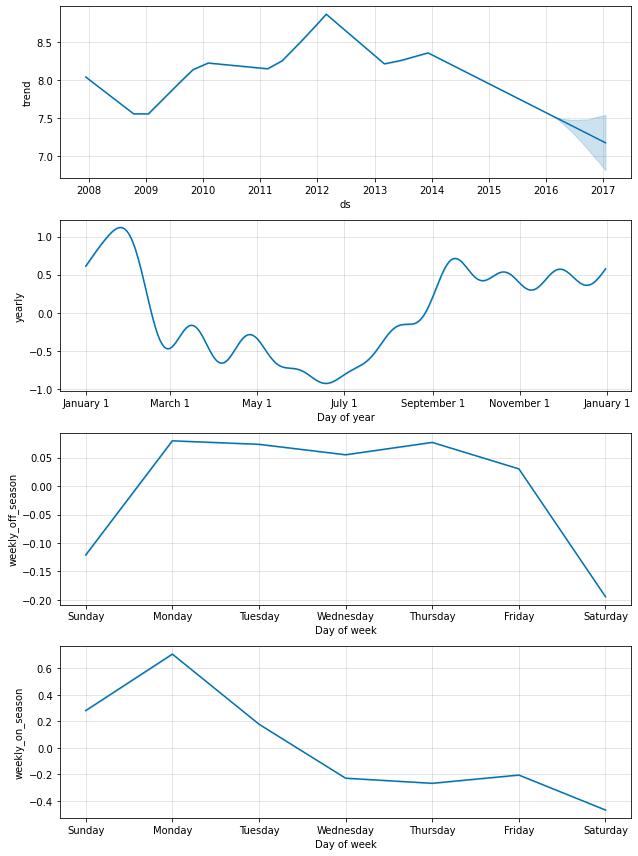

In [92]:
# Disable the built-in weekly seasonality, and replace it with two weekly seasonalities that have these columns specified as a condition
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season' , period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [93]:
# Prior scale for holidays and seasonality
# - If you find that the holidays are overfitting, you can adjust their prior scale to smooth them using the parameter "holidays_prior_scale" 
# - By default this parameter is 10, which provides very little regularization. Reducing this parameter dampens holiday effects.
# - There is a parameter "seasonality_prior_scale" which similarly adjusts the extent to which the seasonality model will fit the data.
# - Prior scales can be set separately for individual holidays by including a column "prior_scale" in the holidays dataframe. 
# - Prior scales for individual seasonalities can be passed as an argument to add_seasonality. 
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/kqxtur57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/2v0wb9d7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33450', 'data', 'file=/tmp/tmp1njg5ry4/kqxtur57.json', 'init=/tmp/tmp1njg5ry4/2v0wb9d7.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modellr97hvkq/prophet_model-20221217080126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,playoff,superbowl
2190,2014-02-02,1.207765,0.963348
2191,2014-02-03,1.855854,0.990907
2532,2015-01-11,1.207765,0.000000
2533,2015-01-12,1.855854,0.000000
2901,2016-01-17,1.207765,0.000000
2902,2016-01-18,1.855854,0.000000
2908,2016-01-24,1.207765,0.000000
2909,2016-01-25,1.855854,0.000000
2922,2016-02-07,1.207765,0.963348
2923,2016-02-08,1.855854,0.990907


INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/4rpoo9in.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/yqypusxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66658', 'data', 'file=/tmp/tmp1njg5ry4/4rpoo9in.json', 'init=/tmp/tmp1njg5ry4/yqypusxt.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model6tv_5wli/prophet_model-20221217080523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


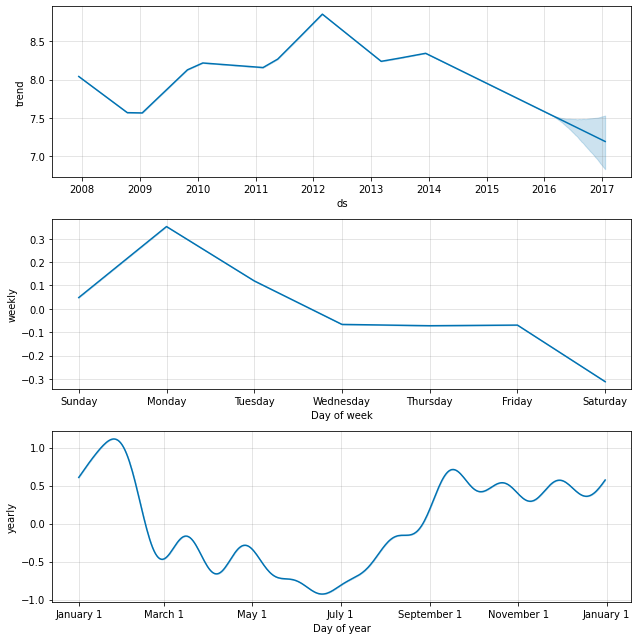

In [94]:
# Example: the prior scale for just weekly seasonality can be set using:
m = Prophet()
m.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/jtgovgiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/8tsjtnhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77957', 'data', 'file=/tmp/tmp1njg5ry4/jtgovgiw.json', 'init=/tmp/tmp1njg5ry4/8tsjtnhu.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelt4qfe8fv/prophet_model-20221217081013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


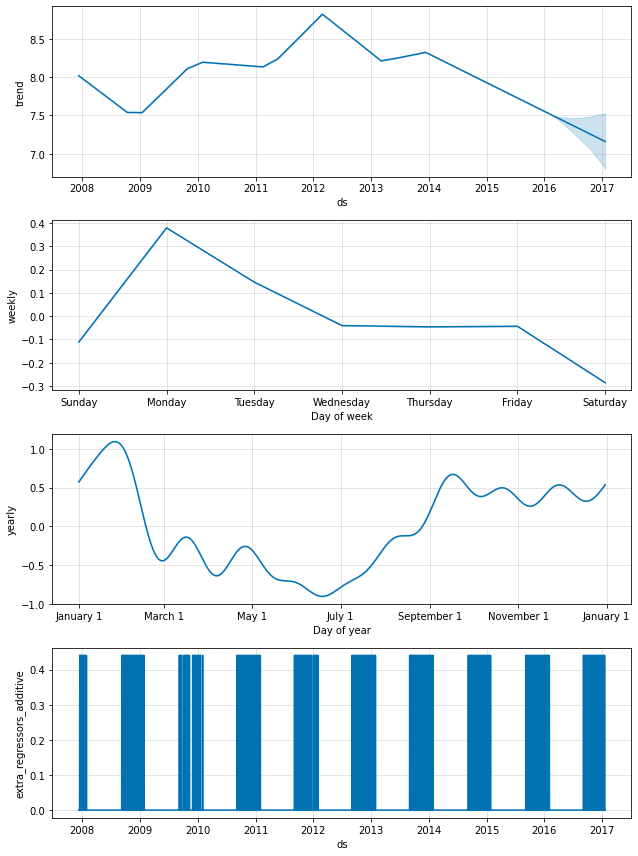

In [95]:
# Additional regressors
# - Add it to the data sets (historical and future)
# - Specify it with function "add_regressor"

def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

In [97]:
from prophet.utilities import regressor_coefficients 
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,nfl_sunday,additive,0.0,0.441139,0.441139,0.441139


In [98]:
# Cleanup
del df, future, forecast
del playoffs, superbowls, holidays
del m, fig, a

**Multiplicative Seasonality**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/j922s897.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/qvzd7j_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65536', 'data', 'file=/tmp/tmp1njg5ry4/j922s897.json', 'init=/tmp/tmp1njg5ry4/qvzd7j_m.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelmejg2me0/prophet_model-20221217082011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:20:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


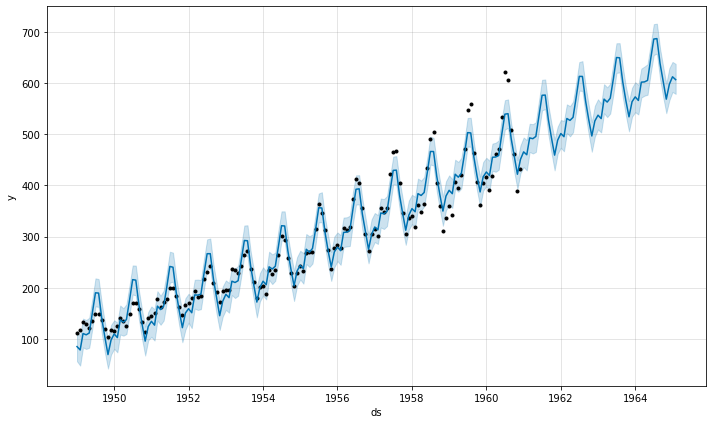

In [100]:
# Default: Additive Seasonality
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/5ic2xffq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/cmsn0i_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20209', 'data', 'file=/tmp/tmp1njg5ry4/5ic2xffq.json', 'init=/tmp/tmp1njg5ry4/cmsn0i_q.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model0_0k8rwg/prophet_model-20221217082016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:20:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:20:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


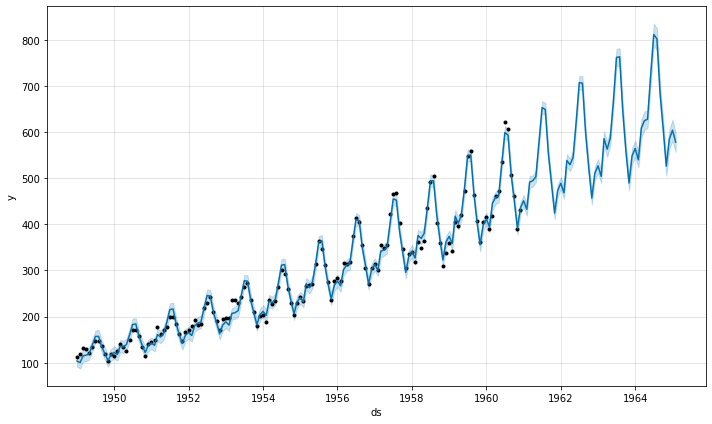

In [101]:
# Multiplicative Seasonality
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

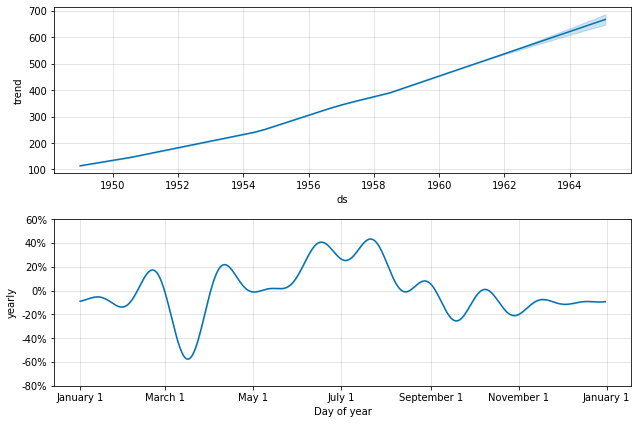

In [102]:
# The components figure will now show the seasonality as a percent of the trend
fig = m.plot_components(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/pk21fks4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/h964kq3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99712', 'data', 'file=/tmp/tmp1njg5ry4/pk21fks4.json', 'init=/tmp/tmp1njg5ry4/h964kq3c.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modeliktqve41/prophet_model-20221217082858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:28:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:28:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


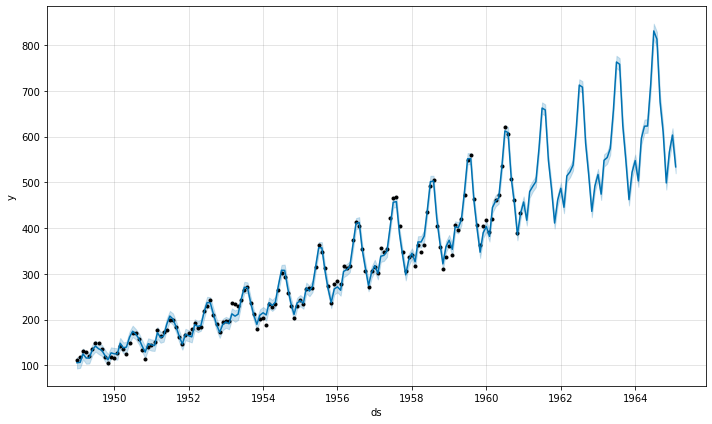

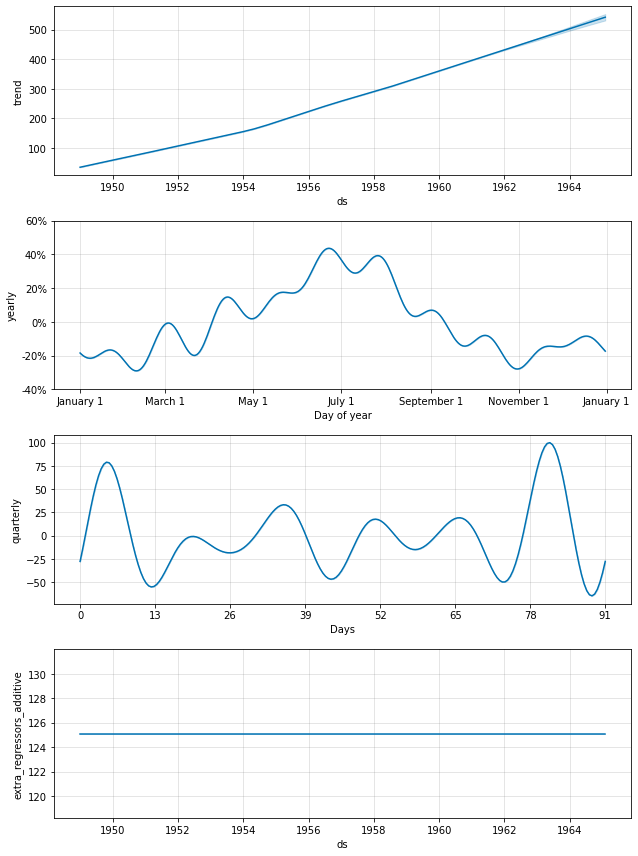

In [108]:
# Example: multiplicative built-in seasonalities + additive quarterly seasonality and an additive regressor:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df['regressor'] = 100

m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_regressor('regressor', mode='additive')
m.fit(df)

future = m.make_future_dataframe(50, freq='MS')
future['regressor'] = 100

forecast = m.predict(future)
fig = m.plot(forecast)
fig = m.plot_components(forecast)

In [109]:
# Cleanup
del df, future, forecast
del m, fig

**Uncertainty Intervals** <BR>
https://facebook.github.io/prophet/docs/uncertainty_intervals.html

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/wrt2t6cs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/awjkml9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99525', 'data', 'file=/tmp/tmp1njg5ry4/wrt2t6cs.json', 'init=/tmp/tmp1njg5ry4/awjkml9l.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelstp47nlm/prophet_model-20221217084120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


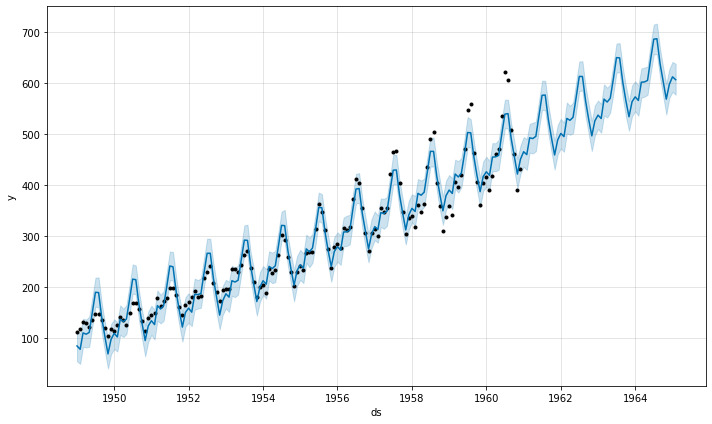

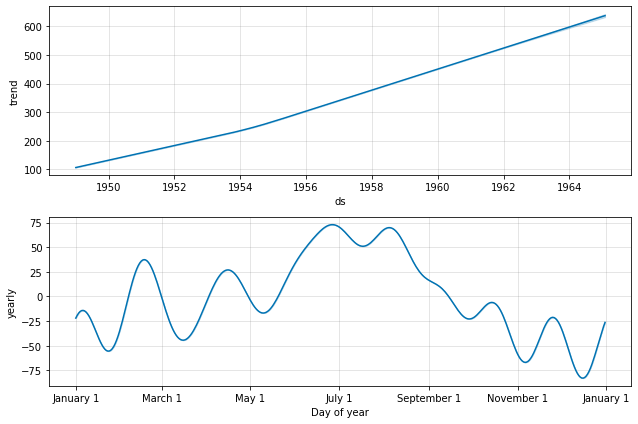

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)

fig = m.plot(forecast)
fig = m.plot_components(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/cx1edg51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/kif1zkqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86290', 'data', 'file=/tmp/tmp1njg5ry4/cx1edg51.json', 'init=/tmp/tmp1njg5ry4/kif1zkqp.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelwpb3ivi6/prophet_model-20221217084221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:42:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:42:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


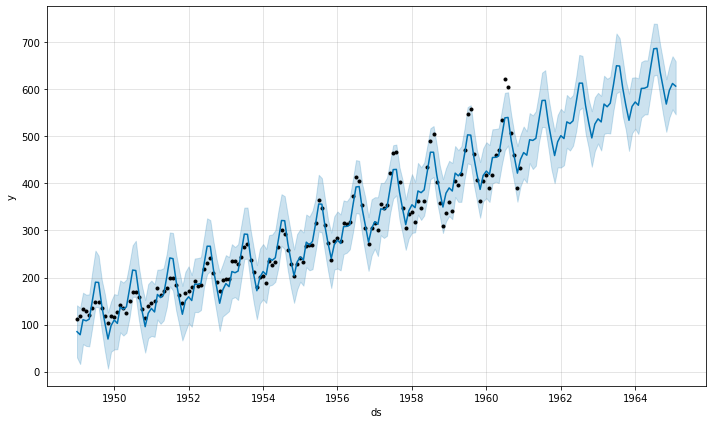

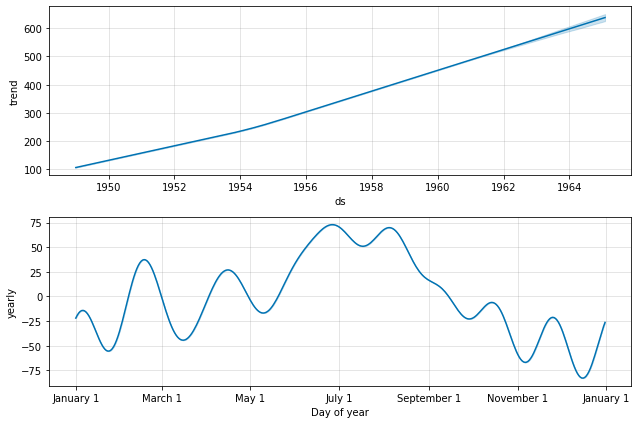

In [113]:
# Uncertainty in the trend
# - If we increase changepoint_prior_scale, will increase the forecast uncertainty, 
#   because if we model more rate changes in the history then we will expect more in the future, 
#   and makes the uncertainty intervals a useful indicator of overfitting.
# - The width of the uncertainty intervals (by default 80%) can be set using the parameter interval_width:
forecast = Prophet(interval_width=0.99).fit(df).predict(future)
fig = m.plot(forecast)
fig = m.plot_components(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/q9hkkkiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/0dczauzz.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:Command ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'info']
	error during processing Machine is not on the network
08:44:22 - cmdstanpy - INFO - CmdStan installation /usr/local/lib/python3.8/dist-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
INFO:cmdstanpy:CmdStan installation /usr/local/lib/python3.8/dist-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:44:22 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
INFO:

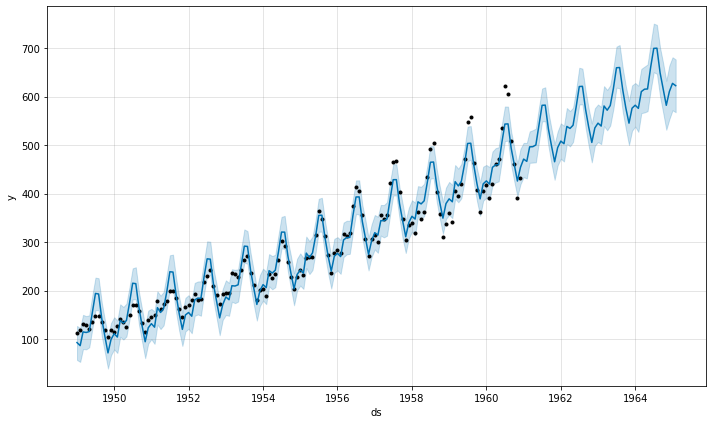

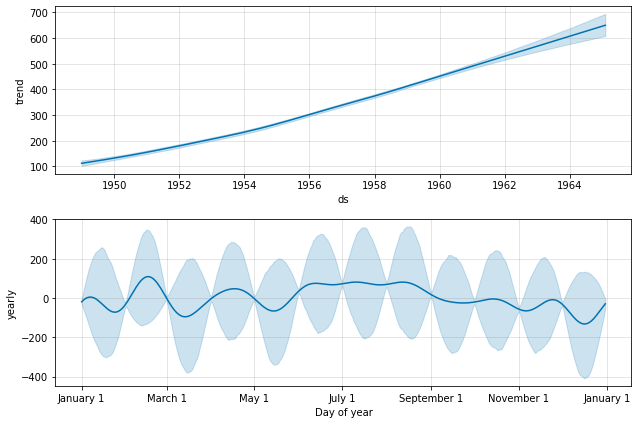

In [114]:
# Uncertainty in seasonality
# By default Prophet will only return uncertainty in the trend and observation noise. 
# To get uncertainty in seasonality, you must do full Bayesian sampling. 
m = Prophet(mcmc_samples=300)
forecast = m.fit(df, show_progress=False).predict(future)
fig = m.plot(forecast)
fig = m.plot_components(forecast)

In [115]:
# You can access the raw posterior predictive samples in Python 
m.predictive_samples(future)

{'yhat': array([[ 39.68191627, 108.85790463,  75.31653735, ..., 100.05315229,
         136.82628782,  92.75989185],
        [ 95.18428845,  84.97215369,  94.67502395, ...,  81.18906208,
          78.65209001,  53.4342847 ],
        [ 96.25025238, 123.94147375, 125.33813402, ...,  85.11558144,
         117.39929898, 111.00302212],
        ...,
        [597.51837824, 600.31340583, 561.76410678, ..., 560.32346047,
         555.28096699, 611.59676642],
        [610.71327744, 610.12608786, 673.99234528, ..., 637.19051833,
         593.61928079, 636.69599785],
        [638.98793344, 635.50740879, 668.80422186, ..., 611.21277352,
         631.91183033, 622.1991148 ]]),
 'trend': array([[114.075422  , 114.075422  , 108.51412   , ..., 105.821482  ,
         112.088754  , 112.088754  ],
        [116.17233064, 116.17233064, 110.34632648, ..., 107.2792712 ,
         113.82989822, 113.82989822],
        [118.06631264, 118.06631264, 112.00122265, ..., 108.59598403,
         115.40254461, 115.4025446

In [116]:
# Cleanup
del df, future, forecast
del m, fig

**Outliers** <BR>
https://facebook.github.io/prophet/docs/outliers.html

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/731i4pav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/t2_czcrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86740', 'data', 'file=/tmp/tmp1njg5ry4/731i4pav.json', 'init=/tmp/tmp1njg5ry4/t2_czcrb.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelwxp78p5a/prophet_model-20221217085519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


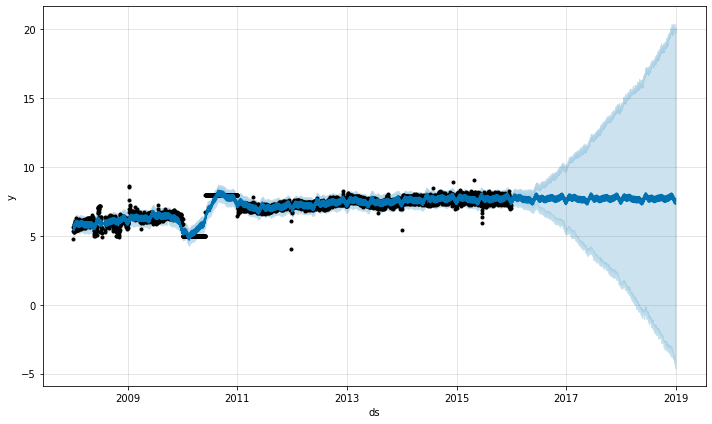

In [117]:
# Situation #1: Outliers impact the width of the prediction intervals
# Load table with a block of bad data
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/mh244vs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/vp30ifu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16713', 'data', 'file=/tmp/tmp1njg5ry4/mh244vs3.json', 'init=/tmp/tmp1njg5ry4/vp30ifu8.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelwxa200ie/prophet_model-20221217085531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


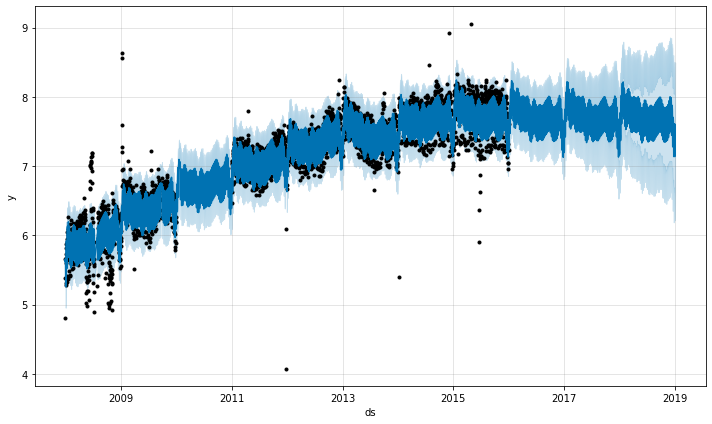

In [118]:
# Remove outliers
# Prophet has no problem with missing data
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/e6q0sb4_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/90m0_9zn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16935', 'data', 'file=/tmp/tmp1njg5ry4/e6q0sb4_.json', 'init=/tmp/tmp1njg5ry4/90m0_9zn.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_model1nek13e1/prophet_model-20221217085901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:59:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


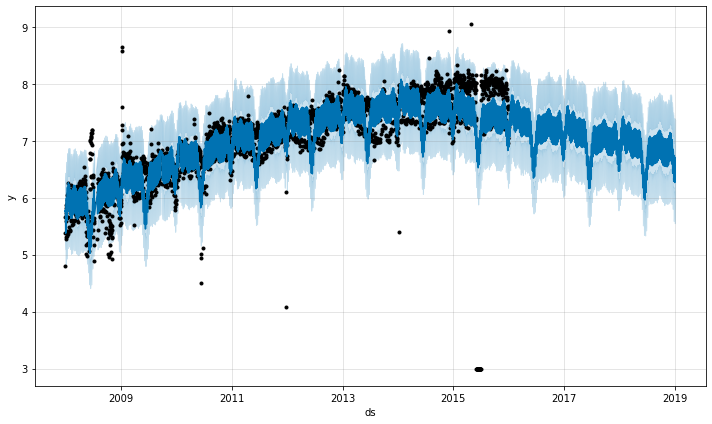

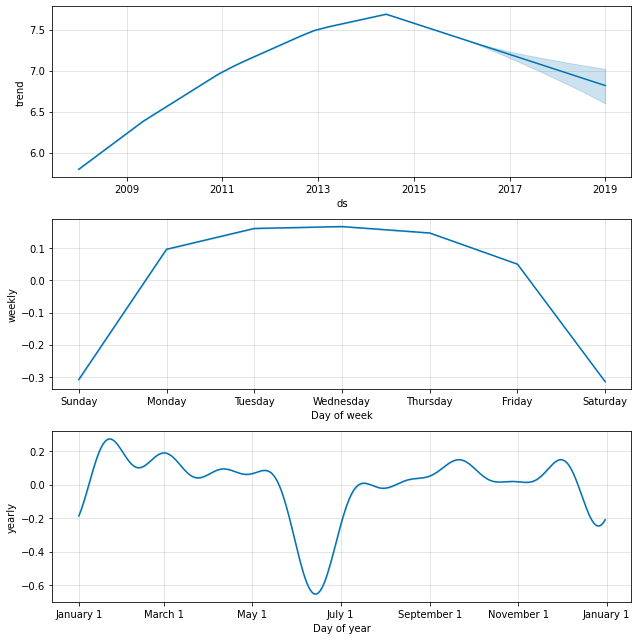

In [120]:
# Situation #2: Outliers affect the trend
# Example: Load data with added outiers (extreme outliers in June 2015 that mess up the seasonality estimate, so their effect reverberates into the future forever.)
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)
fig = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/00qwezfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1njg5ry4/uk0sfu1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66792', 'data', 'file=/tmp/tmp1njg5ry4/00qwezfn.json', 'init=/tmp/tmp1njg5ry4/uk0sfu1z.json', 'output', 'file=/tmp/tmp1njg5ry4/prophet_modelt3tf8pwi/prophet_model-20221217090214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:02:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:02:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


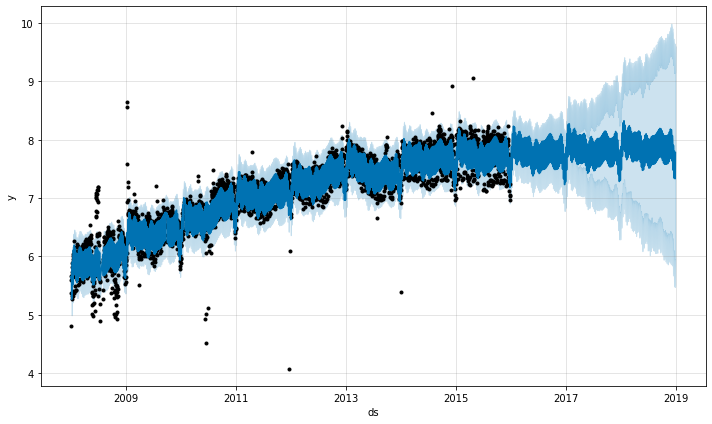

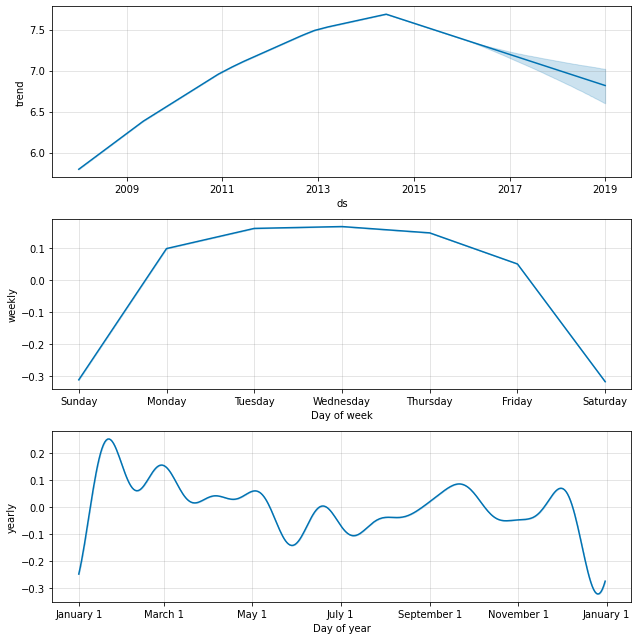

In [123]:
# Remove extreme outliers 
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))
fig = m.plot_components(forecast)